# 2. Предварительный анализ данных. Числовые характеристики

In [12]:
# Import the libraries
import matplotlib.pyplot as plt 
import pandas as pd
import math
import numpy as np
import seaborn as sns

# Домашняя работа

## 1. [# 25] Для данных аварий в шахте в период с 15 марта 1851 года по 22 марта 1962 года.

**1) Найдите все числовые характеристики: выборочное среднее и медиану выборки, нижний и верхний квартили и IQR, стандартное отклонение.**

In [13]:
df = pd.read_excel('days between disasters.xlsx')
data = df['days'].values

def q(dat, m):
    len2 = len(dat) + 1
    k = math.floor(m*len2)
    a = m*len2-k
    res = dat[k]+a*(dat[k+1]-dat[k])
    return res

def Med(arr):
    arr.sort()
    n = len(arr)
    if n % 2 == 0:
        return (arr[n // 2 - 1] + arr[n // 2]) / 2
    else:
        return arr[n // 2]

print("Выборочное среднее =",data.mean())
print("Медиана выборки =", Med(data))
print("Нижний квартиль =", q(data, 0.25))
print("Верхний квартиль =", q(data, 0.75))
print("IQR =", q(data, 0.75) - q(data, 0.25))
print("Стандартное отклонение =", data.std())

Выборочное среднее = 213.4157894736842
Медиана выборки = 113.5
Нижний квартиль = 39.25
Верхний квартиль = 275.0
IQR = 235.75
Стандартное отклонение = 312.72225908885974


In [14]:
df.describe()

,days
count,190.000000
mean,213.415789
std,313.548475
min,0.000000
25%,37.750000
50%,113.500000
75%,270.000000
max,2366.000000


**2) Напишите функцию и найдите MAD.**

In [15]:
def MAD(data):
    median_value = Med(data)
    absolute_deviations = [abs(x - median_value) for x in data]
    return Med(absolute_deviations)

data = df['days'].values
print("Медиана абсолютных отклонений =", MAD(data))

Медиана абсолютных отклонений = 89.5


**3) Вычислите 47-й эмпирический процентиль.**

In [16]:
print("q(0.47) =", q(data, 0.47))

q(0.47) = 100.53999999999999


**4) Постройте boxplot.**

<Axes: >

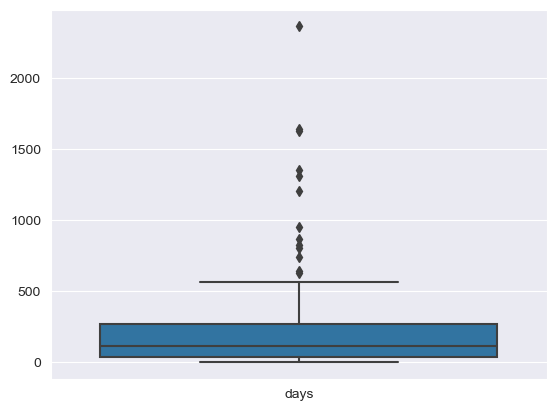

In [17]:
sns.boxplot(df)

 **5) Сделайте выводы.**

Cредняя продолжительность времени в выборке составляет около 213 дней, однако имеется значительный разброс данных. Большинство наблюдений сосредоточены в интервале от 37 до 270 дней, хотя есть как крайне низкие (нулевые) значения, так и очень высокие (до 2366 дней).

## 2. [# 25] Метод исследования чувствительности выборочного среднего и медианы выборки к экстремальным выбросам заключается в замене одного или нескольких элементов в данном наборе данных числом a и исследовании эффекта, когда a стремится к бесконечности. Чтобы проиллюстрировать это, рассмотрите набор данных температуры 1 января в Йошкар-Оле.

**1) Замените один элемент некоторым вещественным числом a. Постройте графики зависимости ¯x_n (a) и Med_n (a). Что происходит с выборочным средним и медианой выборки этого нового набора данных при a→+∞?**

average value = -23.12727272727273
median = -23.0


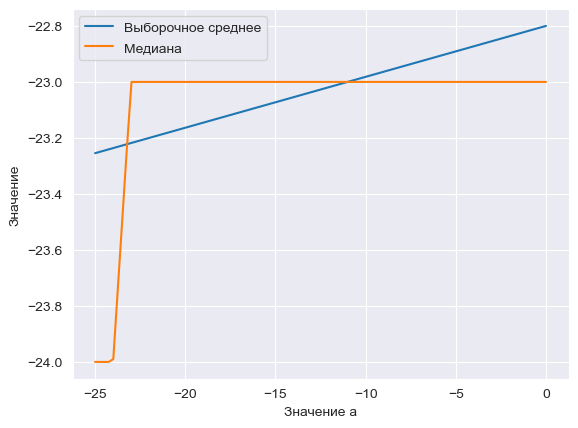

In [18]:
df_data = pd.read_excel('weather.xlsx')
data = df_data['temp']

average_value = np.mean(data)
median = np.median(data)
print('average value =', average_value) 
print('median =', median) 

a_values = np.linspace(-25, 0, 100)

mean_values = []
median_values = []
for a in a_values:
    data[2] = a
    mean_values.append(np.mean(data))
    median_values.append(np.median(data))

plt.plot(a_values, mean_values, label='Выборочное среднее')
plt.plot(a_values, median_values, label='Медиана')
plt.xlabel('Значение a')
plt.ylabel('Значение')
plt.legend()
plt.show()

Наблюдается тенденция стремления медианы к абсолютному значению, в то время как выборочное среднее плавно увеличивается без явных отклонений

**2) Замените несколько элементов на некоторое действительное число a. Сколько элементов нам нужно заменить, чтобы медиана выборки нового набора данных уходила в бесконечность при a→+∞?**

average value = -23.12727272727273
median = -23.0


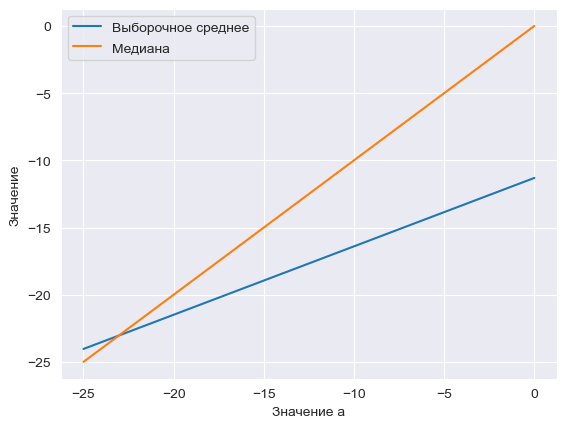

In [19]:
df_data = pd.read_excel('weather.xlsx')
data = df_data['temp']

average_value = np.mean(data)
median = np.median(data)
print('average value =', average_value) 
print('median =', median) 

a_values = np.linspace(-25, 0, 100)

mean_values = []
median_values = []
for a in a_values:
    data[0:28] = a
    mean_values.append(np.mean(data))
    median_values.append(np.median(data))

plt.plot(a_values, mean_values, label='Выборочное среднее')
plt.plot(a_values, median_values, label='Медиана')
plt.xlabel('Значение a')
plt.ylabel('Значение')
plt.legend()
plt.show()

Тенденция наблюдается при замене 28-го элемента и медиана начинает меняться при изменение половины элементов

**3) Предположим, у нас есть другой набор данных размером n. Сколько элементов нужно заменить на некоторое действительное число a, чтобы среднее значение выборки нового набора данных уходило в бесконечность при a→+∞? И сколько элементов нам нужно заменить, чтобы медиана выборки нового набора данных уходила в бесконечность?**

average value = -23.9280205655527
median = -24.0


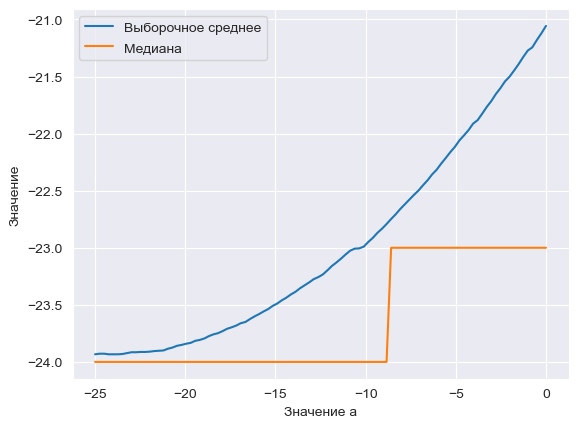

In [20]:
size = np.random.randint(50, 400)
random_array = np.random.randint(-26, -21, size)

average_value = np.mean(random_array)
median = np.median(random_array)
print('average value =', average_value) 
print('median =', median) 

a_values = np.linspace(-25, 0, 100)

mean_values = []
median_values = []
for a in a_values:
    random_array[np.random.randint(0, size - 1)] = a
    mean_values.append(np.mean(random_array))
    median_values.append(np.median(random_array))
    
plt.plot(a_values, mean_values, label='Выборочное среднее')
plt.plot(a_values, median_values, label='Медиана')
plt.xlabel('Значение a')
plt.ylabel('Значение')
plt.legend()
plt.show()

average value = -23.9973474801061
median = -24.0


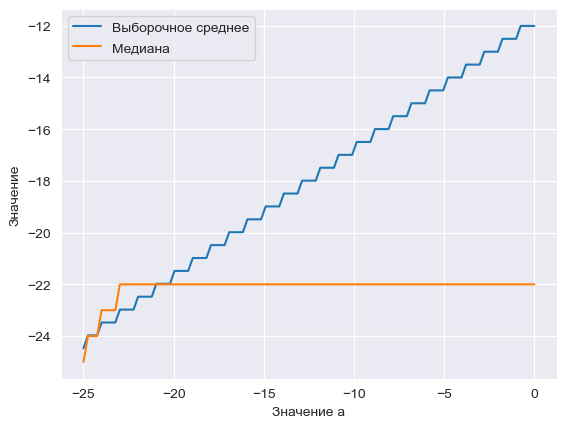

In [21]:
size = np.random.randint(50, 400)
random_array = np.random.randint(-26, -21, size)

average_value = np.mean(random_array)
median = np.median(random_array)
print('average value =', average_value) 
print('median =', median) 

a_values = np.linspace(-25, 0, 100)

mean_values = []
median_values = []
for a in a_values:
    random_array[0:((math.ceil(size/2)) - 1)] = a
    mean_values.append(np.mean(random_array))
    median_values.append(np.median(random_array))
    
plt.plot(a_values, mean_values, label='Выборочное среднее')
plt.plot(a_values, median_values, label='Медиана')
plt.xlabel('Значение a')
plt.ylabel('Значение')
plt.legend()
plt.show()

Выборочное среднее уходит в бесконечность при замене одного элемента, а медиана при n/2(округляя до большего целого)